In [5]:
import time
import chess
import gym
import gym_chess
from tqdm import tqdm

#from utils import save_checkpoint, update_game_metrics, flatten_state, get_custom_reward
from agents import QLearningAgent

import matplotlib.pyplot as plt
import numpy as np 

from stockfish import Stockfish
import argparse
import yaml
import json

2023-06-23 10:44:38.021459: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [92]:
env = gym.make('ChessAlphaZero-v0')
env.reset()

array([[[0, 0, 0, ..., 1, 1, 0],
        [0, 1, 0, ..., 1, 1, 0],
        [0, 0, 1, ..., 1, 1, 0],
        ...,
        [0, 0, 1, ..., 1, 1, 0],
        [0, 1, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0]],

       [[1, 0, 0, ..., 1, 1, 0],
        [1, 0, 0, ..., 1, 1, 0],
        [1, 0, 0, ..., 1, 1, 0],
        ...,
        [1, 0, 0, ..., 1, 1, 0],
        [1, 0, 0, ..., 1, 1, 0],
        [1, 0, 0, ..., 1, 1, 0]],

       [[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0]],

       ...,

       [[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0]],

       [[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        ...,
        [0, 0, 0, ..., 

In [93]:
env.observation_space.shape

(8, 8, 119)

In [94]:
env.action_space.n

4672

In [56]:
next_state, reward, done, _ = env.step(730)

In [64]:
import numpy as np
original_array = 
# Reshape the array to (5, 1, 1, 1)
reshaped_array = np.expand_dims(original_array, axis=(1, 2, 3))

# Repeat the array along the new dimensions to get shape (5, 8, 8, 12)
final_array = np.repeat(reshaped_array, repeats=8, axis=1)
final_array = np.repeat(final_array, repeats=8, axis=2)
final_array = np.repeat(final_array, repeats=12, axis=3)

NameError: name 'original_array' is not defined

In [73]:
exp(1,0)

ZeroDivisionError: division by zero

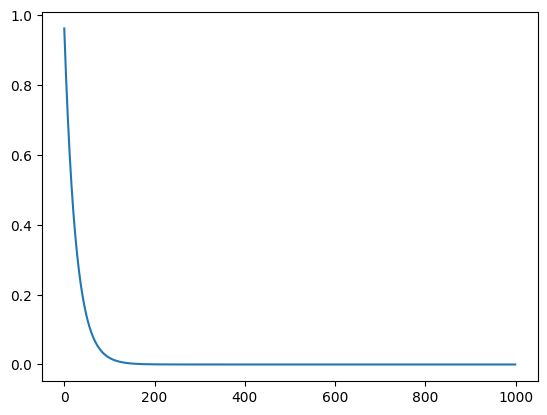

In [87]:

exp = lambda epsilon : epsilon / 1.001

epsilons = []
epsilon = 1
for _ in range(0, 1000):
    epsilon = epsilon / 1.04
    epsilons.append(epsilon)

plt.figure()
plt.plot(np.arange(1000),epsilons)

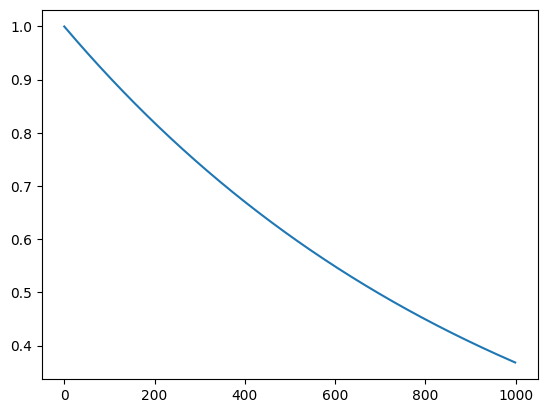

In [91]:
import math

def exponential_decay(epsilon, step, decay_rate):
    min_epsilon = 0.001
    max_epsilon = 1
    new_epsilon = max_epsilon * math.exp(-decay_rate * step)
    
    if new_epsilon < min_epsilon:
        return min_epsilon
    elif new_epsilon > max_epsilon:
        return max_epsilon
    else:
        return new_epsilon

# Example usage:
# current_epsilon = 1
# step_number = 10
# decay_rate = 0.1
# new_epsilon = exponential_decay(current_epsilon, step_number, decay_rate)
# print(new_epsilon)

x = np.arange(0, 1000)
y = [exponential_decay(1, step, 0.01) for step in x]

plt.figure()
plt.plot(x,y)

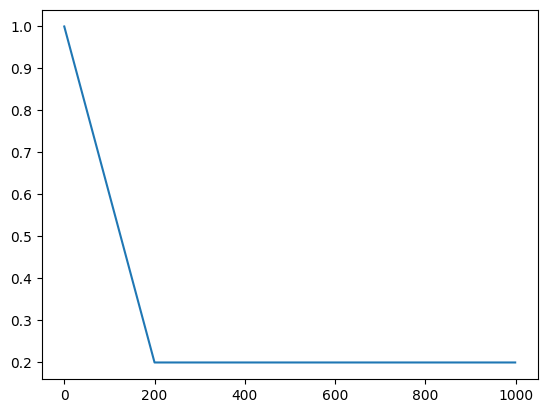

In [10]:
def linear_decay(epsilon, step, total_steps):
    min_epsilon = 0.1
    max_epsilon = 1
    new_epsilon = max_epsilon - (step / total_steps) * (max_epsilon - min_epsilon)
    
    if new_epsilon < min_epsilon:
        return min_epsilon
    elif new_epsilon > max_epsilon:
        return max_epsilon
    else:
        return new_epsilon

# Example usage:
current_epsilon = 1
step_number = 10
total_steps = 100

x = np.arange(0, 1000)
y = [linear_decay(1, step, 200) for step in x]

plt.figure()
plt.plot(x,y)


In [22]:
next_state[:,:,:12].flatten().shape

(768,)

In [55]:
env.legal_actions

[494,
 501,
 129,
 136,
 1095,
 1022,
 949,
 876,
 803,
 730,
 657,
 584,
 1096,
 1023,
 950,
 877,
 804,
 731,
 658,
 585]

In [56]:
from collections import deque

replay_buffer = deque(maxlen=1000)

state, reward, done, _ = env.step(730)
action = 731
next_state, reward, done, _ = env.step(action)
replay_buffer.append((state, action, reward, done, next_state))
state = next_state

action = 804
next_state, reward, done, _ = env.step(action)
replay_buffer.append((state, action, reward, done, next_state))
state = next_state

action = 950
next_state, reward, done, _ = env.step(action)
replay_buffer.append((state, action, reward, done, next_state))
state = next_state

In [70]:
import numpy as np
import random 

In [81]:
minibatch = np.array(random.sample(replay_buffer, 3), dtype=object)
state_list = np.array(minibatch[:,0], dtype=object)

In [85]:
state_list = np.hstack(state_list).reshape(3, 8, 8, 119)

In [87]:
state_list.shape

(3, 8, 8, 119)

In [ ]:
def store_transistion(self, state, action, reward, next_state, done):
        self.replay_buffer.append((state, action, reward, next_state, done))

In [ ]:
self.store_transistion(state, action, reward, next_state, done)

In [24]:
env.action_space

Discrete(4672)

In [31]:
env.decode(2000)

AttributeError: 'NoneType' object has no attribute 'piece_type'

In [15]:
for i in range(100):
    print(env.action_space.sample())

3001
2872
3871
2648
3275
571
2459
2741
4047
2999
485
1269
3593
4219
524
2313
2480
2834
3856
132
4035
2262
1349
2649
3454
2178
72
790
1201
479
623
2407
3599
1970
4322
1699
1757
4179
3450
918
4368
3722
3849
3545
924
247
3436
4192
1627
1553
870
2498
4374
4559
683
2336
4601
474
3906
4103
3731
2622
1178
2416
3290
4134
2342
4358
4041
2162
494
2037
2351
270
1222
3390
2788
2389
3644
2396
1623
635
4188
238
3592
359
4579
3430
1857
2008
3848
2053
645
2758
4206
2489
2332
4042
3015
1100


In [6]:
# order dict from highest to lowest
def dict_sort(d):
    return dict(sorted(d.items(), key=lambda x: x[1], reverse=True))

# print dict in order
dict_sort(values)

{4385: 0.9997244926071289,
 2217: 0.999632656809581,
 49: 0.9995408210120331,
 4434: 0.999265313619162,
 2266: 0.9991734778218415,
 98: 0.9990816420240662,
 4483: 0.9988061346311952,
 2315: 0.9987142988338746,
 147: 0.9986224630360994,
 4532: 0.998346955643683,
 2364: 0.9982551198459078,
 196: 0.9981632840481325,
 4581: 0.9978877766552614,
 2413: 0.9977959408579409,
 245: 0.9977041050601656,
 4630: 0.9974285976677493,
 2462: 0.997336761869974,
 294: 0.9972449260721987,
 4679: 0.9969694186793276,
 2511: 0.9968775828820071,
 343: 0.9967857470842318,
 4728: 0.9965102396918155,
 2560: 0.9964184038940402,
 392: 0.996326568096265,
 4777: 0.9960510607033939,
 2609: 0.9959592249060734,
 441: 0.9958673891082981,
 4826: 0.9955918817158818,
 2658: 0.9955000459181065,
 490: 0.9954082101203312,
 4875: 0.9951327027274601,
 2707: 0.9950408669301396,
 539: 0.9949490311323643,
 4924: 0.994673523739948,
 2756: 0.9945816879421727,
 588: 0.9944898521443974,
 4973: 0.9942143447515264,
 2805: 0.994122508954

In [32]:
# Import the libraries required in this example:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (NumPy arrays):
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Allocate 10,000 samples for validation:
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Minimize loss:
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # Monitor metrics:
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # Validation of loss and metrics
    # at the end of each epoch:
    validation_data=(x_val, y_val),
)

history.history

print("Evaluate model on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(x_test[:1])
print("prediction shape:", prediction.shape)

11490434/11490434 [==============================] - 8s 1us/step
Fit model on training data
Epoch 1/2
782/782 [==============================] - 2s 2ms/step - loss: 0.3392 - sparse_categorical_accuracy: 0.9039 - val_loss: 0.1867 - val_sparse_categorical_accuracy: 0.9466
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.1591 - sparse_categorical_accuracy: 0.9523 - val_loss: 0.1314 - val_sparse_categorical_accuracy: 0.9630
Evaluate model on test data
79/79 [==============================] - 0s 2ms/step - loss: 0.1302 - sparse_categorical_accuracy: 0.9603
test loss, test acc: [0.13022162020206451, 0.9603000283241272]
Generate a prediction
1/1 [==============================] - 0s 79ms/step
prediction shape: (1, 10)


In [33]:
prediction

array([[6.5909412e-06, 4.3930575e-07, 1.8799146e-04, 2.0909435e-04,
        6.2949766e-08, 7.2605559e-07, 6.7664069e-11, 9.9947935e-01,
        2.2602323e-06, 1.1346632e-04]], dtype=float32)

In [38]:
import numpy as np

legal_actions = [0,3,5]

In [37]:
np.argmax(prediction.flatten())

7

In [40]:
{action: prediction.flatten()[action] for action in legal_actions}

{0: 6.590941e-06, 3: 0.00020909435, 5: 7.260556e-07}

In [41]:
dictionary = {action: prediction.flatten()[action] for action in legal_actions}

# take the key of the dictionary that contains the highest number
# if the values of the dictionary tied, take a random key
best_action = max(dictionary, key=dictionary.get)

In [42]:
best_actions = []

In [43]:
state[:,:,:12]

3